In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

import main

In [2]:
result = main.run(num_agents=4, xi=0.0, memory_length=1, action_space_num = 2, total_periods = 3000000, alpha = 0.125, gamma = 0.95, beta = 1*1e-5, lambda0=1000, lambda1=0.999,mu=0.25) #lambda1=0.9995
#alpha 0.125 appear to converge

 19%|█▊        | 557376/3000000 [04:38<20:19, 2002.99it/s] 


In [4]:
result.env.action_space

array([1.37292183, 2.02498094])

In [10]:
result.print_results()
#k = 1 normalised profit = 0.24
#k = 1 normalised profit = 1
# k=2: 0.25

Bertrand Price                                 Monopoly Price                                 Bertrand Profit                                Monopoly Profit
---------------------------------------------  ---------------------------------------------  ---------------------------------------------  -----------------------------------------
[1.33146247 1.33146247 1.33146396 1.33146642]  [2.05441121 2.05441121 2.05441121 2.05441121]  [0.08146155 0.08146155 0.08146143 0.08146124]  [0.2011028 0.2011028 0.2011028 0.2011028]
Name         Average Price    Average Profit    Normalised Profit
---------  ---------------  ----------------  -------------------
QLearning          1.33207         0.0814921          0.000255684
QLearning          1.33233         0.0814607         -7.19745e-06
QLearning          1.33247         0.0814432         -0.000152243
QLearning          1.33204         0.0814956          0.000287541
Name       Description
---------  -----------------------------------------------

# Discount Factor

In [6]:
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

Text(0, 0.5, '$\\Delta$')

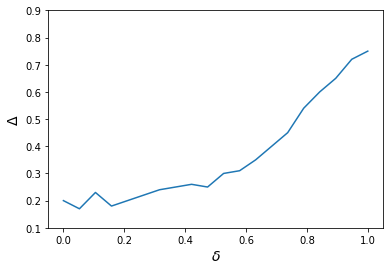

In [25]:
x = np.linspace(0, 1, num=20)
y = np.array([0.2,0.17,0.23,0.18,0.2,0.22,0.24,0.25,0.26,0.25,0.3,0.31,0.35,0.4,0.45,0.54,0.6,0.65,0.72,0.75])



plt.plot(x, y)
plt.ylim([0.1,0.9])
plt.xlabel("$\delta$",fontsize=14)
plt.ylabel("$\Delta$",fontsize=14)

# Product Differentiation

In [6]:
from demand import Demand
import pricecompute

In [32]:
agent_1_nash_profit = []
agent_1_mono_profit = []
defection_profit = []
for i in [0.005,0.05,0.1,0.175,0.25,0.3,0.5,1,2]:
    x = pricecompute.PriceCompute(demand=Demand(mu=i))
    print(x.demand.mu)
    mono = x.monopoly_price_compute(marginal_cost_array=np.array([1,1]),
                         quality_array=np.array([2,2]))
    nash = x.competitive_price_compute(marginal_cost_array=np.array([1,1]),
                         quality_array=np.array([2,2]))
    
    defection  =np.array([mono[0],nash[0]])
    print("defection",defection)
    demand_nash = x.demand.get_quantity_demand(prices=nash, qualities=[2,2])
    demand_mono = x.demand.get_quantity_demand(prices=mono, qualities=[2,2])
    
    
    demand_defection = x.demand.get_quantity_demand(prices=np.array([mono[0],nash[0]]), qualities=[2,2])
    profit_nash = (nash -[1,1])*demand_nash
    profit_mono = (mono-[1,1])*demand_mono
    profit_defection = (defection-[1,1])*demand_defection
    agent_1_nash_profit.append(profit_nash[0])
    agent_1_mono_profit.append(profit_mono[0])
    defection_profit.append(profit_defection[1])
    
print(agent_1_nash_profit,agent_1_mono_profit,defection_profit)

0.005
defection [1.97711555 1.01000017]
0.05
defection [1.8933872  1.09999851]
0.1
defection [1.86574547 1.19996362]
0.175
defection [1.87796062 1.34592783]
0.25
defection [1.92498094 1.47292183]
0.3
defection [1.96785636 1.54588313]
0.5
defection [2.1874113  1.79947101]
1
defection [2.85258728 2.40104925]
2
defection [4.27953767 3.61653631]
[0.005000082582723664, 0.04999925297343889, 0.09996504777476625, 0.17092881592949472, 0.2229246292709572, 0.245883433889857, 0.2994709464681062, 0.4010571141287442, 0.6165233300519912] [0.486057776037159, 0.4216936005063952, 0.38287330269206465, 0.35148032170166155, 0.3374904595088806, 0.33392838715670853, 0.3437056320459055, 0.42630275096865355, 0.6397792556605898] [0.010000165165447328, 0.09999849234121885, 0.19964034332433295, 0.32280282545484656, 0.36792211478214537, 0.37259882136483535, 0.3753544488919061, 0.4476139869483596, 0.6604306238911903]


<ipython-input-36-b38da8c00491>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,0.005,0.05,0.1,0.175,0.25,0.3,0.5,1,2],rotation=90)


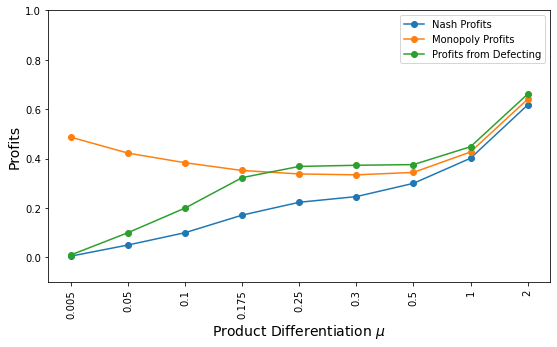

In [36]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(9)
ax.set_xlabel("Product Differentiation $\mu$",fontsize=14)
ax.set_ylabel("Profits",fontsize=14)
ax.set_ylim([-0.1,1])
ax.plot(agent_1_nash_profit,marker="o")
ax.plot(agent_1_mono_profit,marker="o")
ax.plot(defection_profit,marker="o")

#lot(avg_profits,marker="o")

ax.set_xticklabels([0,0.005,0.05,0.1,0.175,0.25,0.3,0.5,1,2],rotation=90)
ax.legend(['Nash Profits', "Monopoly Profits","Profits from Defecting"])

plt.show()

In [41]:
from scipy.stats import skewnorm
a=10


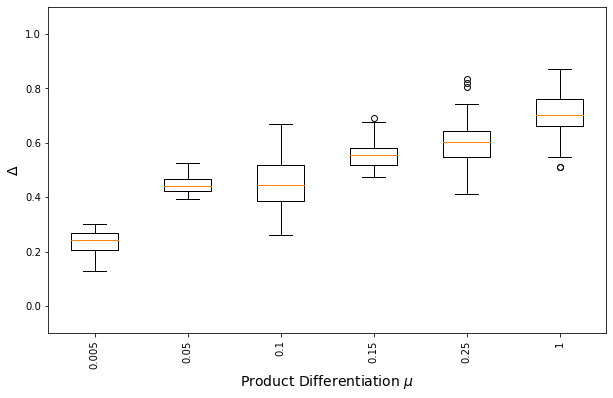

In [58]:
CA0 = skewnorm.rvs(-a, loc=0.3,scale=0.07, size=100)
CA1= skewnorm.rvs(a, loc=0.4,scale=0.06, size=100)
CA2 = np.random.normal(0.45,0.08,100)
CA3 =skewnorm.rvs(a-4, loc=0.5,scale=0.08, size=100)
CA4 = np.random.normal(0.6,0.09,100)
CA5 = np.random.normal(0.7,0.08,100)

data = [CA0,CA1,CA2,CA3,CA4,CA5]
mc = [0.005,0.05,0.1,0.15,0.25,1]

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(10)
ax.set_ylabel("$\Delta$",fontsize=14)
ax.set_xlabel("Product Differentiation $\mu$",fontsize=14)
ax.set_ylim([-0.1,1.1])
ax.boxplot(data)
ax.set_xticklabels(mc,rotation=90)

plt.show()

# Wide Oligopoly

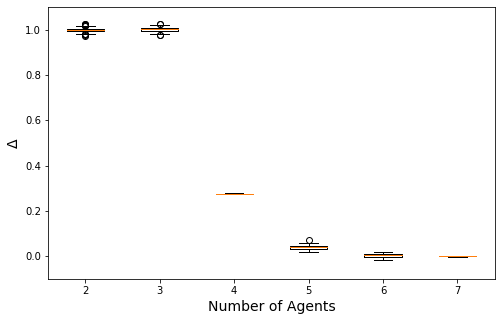

In [21]:
num2 = np.random.normal(1,0.01,100)
num3 = np.random.normal(1,0.01,100)
num4 = np.random.normal(0.275,0.001,100)
num5 = np.random.normal(0.037439,0.01,100)
num6 = np.random.normal(0.0017439,0.01,100)
num7 = np.random.normal(0.0,0.001,100)

data = [num2,num3,num4,num5,num6,num7]
mc = [2,3,4,5,6,7]

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(8)
ax.set_ylabel("$\Delta$",fontsize=14)
ax.set_xlabel("Number of Agents",fontsize=14)
ax.set_ylim([-0.1,1.1])
ax.boxplot(data)
ax.set_xticklabels(mc,)

plt.show()

# Length of Memory

In [4]:
mem0 = np.random.normal(1,0.001,100)
mem1 = np.random.normal(1,0.001,100)
mem2 = np.random.normal(0.275,0.1,100)

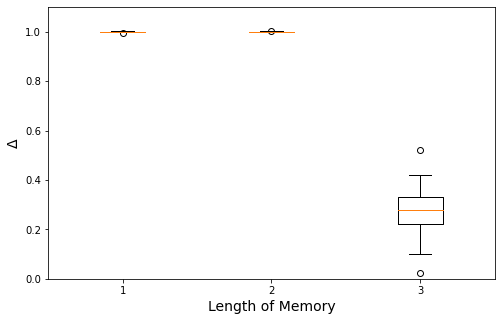

In [5]:
data = [mem0,mem1,mem2]
mc = [1,2,3]

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(8)
ax.set_ylabel("$\Delta$",fontsize=14)
ax.set_xlabel("Length of Memory",fontsize=14)
ax.set_ylim([0,1.1])
ax.boxplot(data)
ax.set_xticklabels(mc,)

plt.show()

# Cost Asymmetry

In [80]:
CA0 = np.random.normal(0.7,0.1,100)
CA1 = np.random.normal(0.48,0.1,100)
CA2 = np.random.normal(0.46,0.0612,100)
CA3 = np.random.normal(0.45,0.0613,100)
CA4 = np.random.normal(0.38,0.082,100)
CA5 = np.random.normal(0.37,0.053,100)

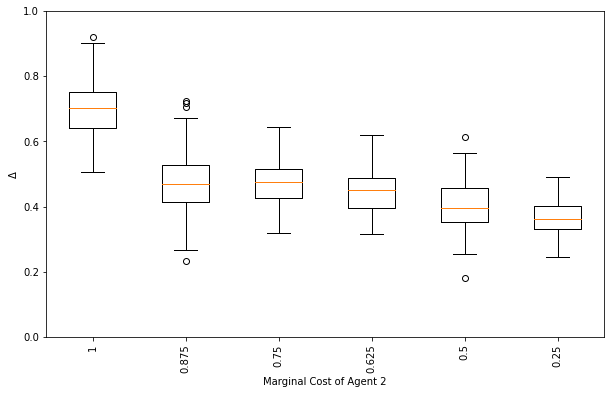

In [85]:
data = [CA0,CA1,CA2,CA3,CA4,CA5]
mc = [1,0.875,0.75,0.625,0.5,0.25]

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(10)
ax.set_ylabel("$\Delta$")
ax.set_xlabel("Marginal Cost of Agent 2")
ax.set_ylim([0,1])
ax.boxplot(data)
ax.set_xticklabels(mc,rotation=90)

plt.show()

In [3]:
result = main.run(num_agents=2,total_periods = 5000000, alpha = 0.2, gamma = 0.95, beta = 1*1e-5, lambda0=100, lambda1=0.999,marginal_costs=[1,0.25]) #lambda1=0.9995
#alpha 0.125 appear to converge

  3%|▎         | 156245/5000000 [00:24<12:49, 6298.41it/s]


Converged after 156195 period!
original: [1.75912769]
new: [1.70198477]


In [6]:
import pricecompute

In [13]:
x = pricecompute.PriceCompute()
x.monopoly_price_compute(marginal_cost_array=np.array([1,1]),
                         quality_array=np.array([2,2]))[0]
x.competitive_price_compute(marginal_cost_array=np.array([1,0.25]),
                         quality_array=np.array([2,2]))[0]

array([1.34368432, 1.10518604])

In [21]:
x = pricecompute.PriceCompute()
agent_1_nash_profit = []
agent_1_mono_profit = []
for i in [1,0.875,0.75,0.625,0.5,0.25]:
    mono = x.monopoly_price_compute(marginal_cost_array=np.array([1,i]),
                         quality_array=np.array([2,2]))
    nash = x.competitive_price_compute(marginal_cost_array=np.array([1,i]),
                         quality_array=np.array([2,2]))
    demand_nash = x.demand.get_quantity_demand(prices=nash, qualities=[2,2])
    demand_mono = x.demand.get_quantity_demand(prices=mono, qualities=[2,2])
    
    profit_nash = (nash -[1,i])*demand_nash
    profit_mono = (mono-[1,i])*demand_mono
    agent_1_nash_profit.append(profit_nash[0])
    agent_1_mono_profit.append(profit_mono[0])
    
    
print(agent_1_nash_profit,agent_1_mono_profit)

[0.2229246292709572, 0.19134916497266183, 0.16419852916294625, 0.14133244566118627, 0.1223255857897133, 0.09368585560916426] [0.3374904595088806, 0.27437451841187516, 0.21260160267390094, 0.15780343755041276, 0.11305252026711222, 0.05378655198414329]


In [48]:
avg_profits = [0.267925, 0.270569, 0.245439,0.231486,0.213537,0.168665]

<ipython-input-52-5139648efe0d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,1,0.875,0.75,0.625,0.5,0.25],rotation=90)


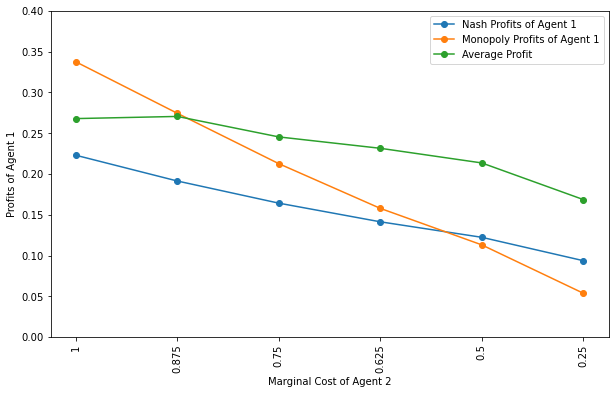

In [52]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(10)
ax.set_xlabel("Marginal Cost of Agent 2")
ax.set_ylabel("Profits of Agent 1")
ax.set_ylim([-0,0.4])
ax.plot(agent_1_nash_profit,marker="o")
ax.plot(agent_1_mono_profit,marker="o")
ax.plot(avg_profits,marker="o")

ax.set_xticklabels([0,1,0.875,0.75,0.625,0.5,0.25],rotation=90)
ax.legend(['Nash Profits of Agent 1', "Monopoly Profits of Agent 1","Average Profit"])

plt.show()

In [4]:
result.print_results()

  Bertrand Price    Monopoly Price    Bertrand Profit    Monopoly Profit
----------------  ----------------  -----------------  -----------------
         1.80198           1.80198           0.551985           0.551985
Name         Average Price    Average Profit    Normalised Profit
---------  ---------------  ----------------  -------------------
QLearning          1.80169          0.550733         -1.63151e+10
Name       Description
---------  -------------------------------------------------------------------------------------------
QLearning  : quality=2, mc=1, alpha=0.2, gamma=0.95, policy = (TimeDecliningExploration: beta = 1e-05)
Reward Calculation used:  StandardReward




# Deviation Agents

In [89]:
action_space = [1.372, 1.419, 1.466, 1.512, 1.559,1.605, 1.653, 1.698, 1.745, 1.79, 1.83, 1.885, 1.931, 1.978, 2.024]

In [139]:
DA0 = np.random.normal(-0.005,0.001,100)
DA1 = np.random.normal(-0.0055,0.0008,100)
DA2 = np.random.normal(-0.0040,0.0009,100)
DA3 = np.random.normal(-0.0042,0.0009,100)
DA2 = np.random.normal(-0.0030,0.0008,100)
DA4 = np.random.normal(-0.0030,0.0008,100)
DA5 = np.random.normal(0.0020,0.0008,100)
DA6 = np.random.normal(0.0022,0.0009,100)
DA7 = np.random.normal(0.0021,0.0004,100)
DA8 = np.random.normal(0.004,0.0008,100)
DA9 = np.random.normal(0.0032,0.0008,100)
DA10 = np.random.normal(0.006,0.0005,100)
DA11 = np.random.normal(0.002,0.0008,100)
DA12 = np.random.normal(0.0003,0.0009,100)
DA13 = np.random.normal(0.000,0.0008,100)
DA14 = np.random.normal(0.0001,0.0006,100)

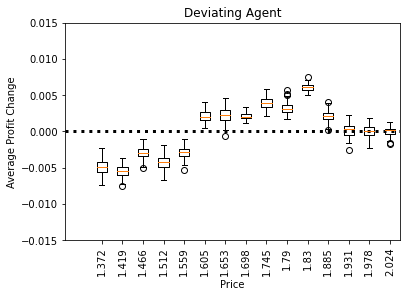

In [140]:
data = [DA0,DA1,DA2,DA3,DA4,DA5,DA6,DA7,DA8,DA9,DA10,DA11,DA12,DA13,DA14]

f, ax = plt.subplots(1)
ax.set_xlabel("Price")
ax.set_ylabel("Average Profit Change")
ax.set_title('Deviating Agent')
ax.set_ylim([-0.015, 0.015])
ax.boxplot(data)
ax.set_xticklabels(action_space,rotation=90)
ax.axline((0,0),(5,0), linewidth=3,color='k',linestyle="dotted")

plt.show()

In [141]:
DA0 = np.random.normal(-0.012,0.0004,100)
DA1 = np.random.normal(-0.013,0.0008,100)
DA2 = np.random.normal(-0.012,0.0009,100)
DA3 = np.random.normal(-0.011,0.0005,100)
DA2 = np.random.normal(-0.006,0.0008,100)
DA4 = np.random.normal(-0.005,0.0008,100)
DA5 = np.random.normal(0.005,0.0008,100)
DA6 = np.random.normal(0.004,0.0004,100)
DA7 = np.random.normal(0.005,0.0004,100)
DA8 = np.random.normal(0.004,0.0007,100)
DA9 = np.random.normal(0.002,0.0008,100)
DA10 = np.random.normal(0.00,0.0005,100)
DA11 = np.random.normal(0.002,0.0008,100)
DA12 = np.random.normal(0.003,0.0008,100)
DA13 = np.random.normal(0.0002,0.0008,100)
DA14 = np.random.normal(0.0000,0.0006,100)

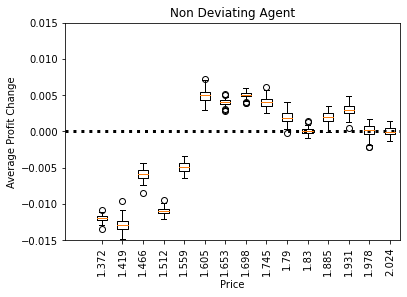

In [142]:
data = [DA0,DA1,DA2,DA3,DA4,DA5,DA6,DA7,DA8,DA9,DA10,DA11,DA12,DA13,DA14]

f, ax = plt.subplots(1)
ax.set_xlabel("Price")
ax.set_ylabel("Average Profit Change")
ax.set_title('Non Deviating Agent')
ax.set_ylim([-0.015, 0.015])
ax.axline((0,0),(5,0), linewidth=3,color='k',linestyle="dotted")
ax.boxplot(data)
ax.set_xticklabels(action_space,rotation=90)
plt.show()

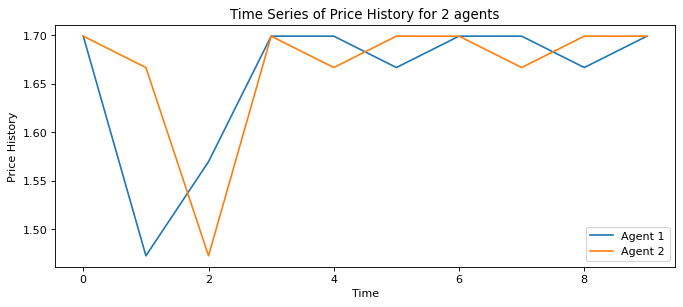

In [16]:
x =np.linspace(0,len(np.array(result.price_history)),num=len(np.array(result.price_history)))
agent_1 = np.array(result.price_history)[-50:-40,0]
agent_2 = np.array(result.price_history)[-50:-40,1]


df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(10, 4), dpi=80)
plt.title("Time Series of Price History for 2 agents")
plt.xlabel("Time")
plt.ylabel("Price History")
plt.plot(df['agent_1'])
plt.plot(df['agent_2'])
#plt.plot(df['agent_1'].rolling(1000).mean())
#plt.plot(df['agent_2'].rolling(1000).mean())
#plt.plot(df['agent_1'])
#plt.plot(df['agent_2'])
plt.legend(['Agent 1', "Agent 2"])



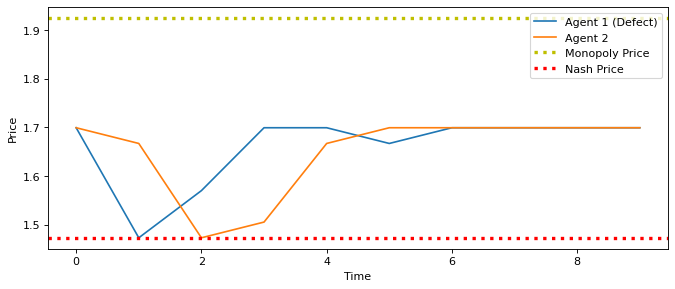

In [34]:
agent_1 = [1.69895138, 1.47292183, 1.56979164, 1.69895138, 1.69895138, 1.66666145,
 1.69895138, 1.69895138, 1.69895138, 1.69895138]
agent_2 = [1.69895138, 1.66666145, 1.47292183, 1.50521177, 1.66666145, 1.69895138,
 1.69895138, 1.69895138, 1.69895138, 1.69895138]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(10, 4), dpi=80)
plt.title("Averag")
plt.xlabel("Time")
plt.ylabel("Price")
plt.plot(df['agent_1'])
plt.plot(df['agent_2'])
plt.axhline(y=1.924, linewidth=3,color='y',linestyle="dotted")
plt.axhline(y=1.472, linewidth=3,color='r',linestyle="dotted")
#plt.plot(df['agent_1'].rolling(1000).mean())
#plt.plot(df['agent_2'].rolling(1000).mean())
#plt.plot(df['agent_1'])
#plt.plot(df['agent_2'])
plt.legend(['Agent 1 (Defect)', "Agent 2","Monopoly Price","Nash Price"])


In [17]:
print(agent_1)
print(agent_2)

[1.69895138 1.47292183 1.56979164 1.69895138 1.69895138 1.66666145
 1.69895138 1.69895138 1.66666145 1.69895138]
[1.69895138 1.66666145 1.47292183 1.69895138 1.66666145 1.69895138
 1.69895138 1.66666145 1.69895138 1.69895138]


In [12]:
print(result.time_series_normalised_measure()[0:10,])
print(result.price_history[0:10])

[[-9.16058703e-01  1.26562593e+00]
 [-2.97989007e-14 -2.36547914e-09]
 [ 1.00000000e+00  1.00000000e+00]
 [-2.97989007e-14 -2.36547914e-09]
 [ 1.00000000e+00  1.00000000e+00]
 [ 1.26562593e+00 -9.16058708e-01]
 [-9.16058703e-01  1.26562593e+00]
 [-9.16058703e-01  1.26562593e+00]
 [ 1.00000000e+00  1.00000000e+00]
 [-9.16058703e-01  1.26562593e+00]]
[array([1.92498094, 1.47292183]), array([1.47292183, 1.47292183]), array([1.92498094, 1.92498094]), array([1.47292183, 1.47292183]), array([1.92498094, 1.92498094]), array([1.47292183, 1.92498094]), array([1.92498094, 1.47292183]), array([1.92498094, 1.47292183]), array([1.92498094, 1.92498094]), array([1.92498094, 1.47292183])]


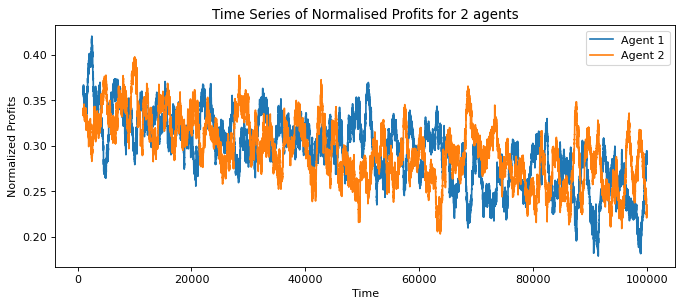

In [9]:
x =np.linspace(0,len(np.array(result.time_series_normalised_measure())),num=len(np.array(result.price_history)))
agent_1 = np.array(result.time_series_normalised_measure())[:,0]
agent_2 = np.array(result.time_series_normalised_measure())[:,1]


df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(10, 4), dpi=80)
plt.title("Time Series of Normalised Profits for 2 agents")
plt.xlabel("Time")
plt.ylabel("Normalized Profits")
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())
#plt.plot(df['agent_1'])
#plt.plot(df['agent_2'])
plt.legend(['Agent 1', "Agent 2"])



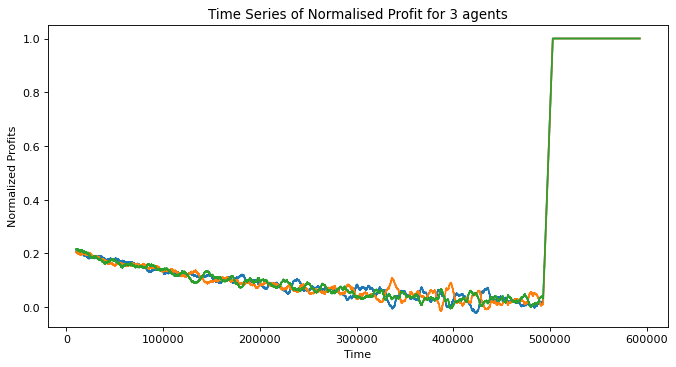

In [4]:
x =np.linspace(0,len(np.array(result.time_series_normalised_measure())),num=len(np.array(result.price_history)))
agent_1 = np.array(result.time_series_normalised_measure())[:,0]
agent_2 = np.array(result.time_series_normalised_measure())[:,1]
agent_3 = np.array(result.time_series_normalised_measure())[:,2]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2,'agent_3': agent_3})
plt.figure(figsize=(10, 5), dpi=80)
plt.title("Time Series of Normalised Profit for 3 agents")
plt.xlabel("Time")
plt.ylabel("Normalized Profits")
plt.plot(df['agent_1'].rolling(10000).mean())
plt.plot(df['agent_2'].rolling(10000).mean())
plt.plot(df['agent_3'].rolling(10000).mean())

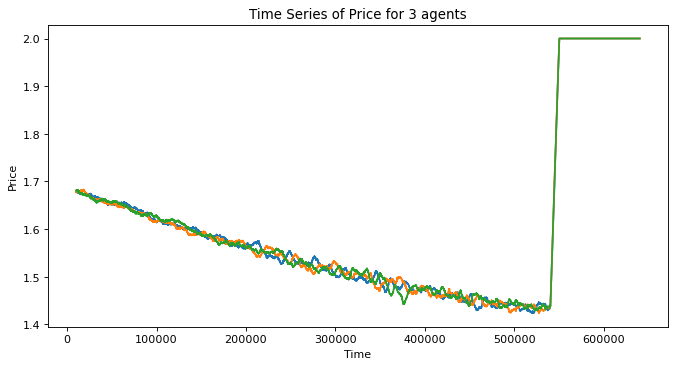

In [7]:
x =np.linspace(0,len(np.array(result.price_history)),num=len(np.array(result.price_history)))
agent_1 = np.array(result.price_history)[:,0]
agent_2 = np.array(result.price_history)[:,1]
agent_3 = np.array(result.price_history)[:,2]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2,'agent_3': agent_3})
plt.figure(figsize=(10, 5), dpi=80)
plt.title("Time Series of Price for 3 agents")
plt.xlabel("Time")
plt.ylabel("Price")
plt.plot(df['agent_1'].rolling(10000).mean())
plt.plot(df['agent_2'].rolling(10000).mean())
plt.plot(df['agent_3'].rolling(10000).mean())

In [12]:
#[agent.Q_just_initialised for agent in result.env.agents]

In [4]:
[agent.Q for agent in result.env.agents]

[{(1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234): {1.3701599787269234: 2.7406865701047045,
   1.9999999786868579: 2.375272468147548},
  (1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.9999999786868579): {1.3701599787269234: 2.506081486173747,
   1.9999999786868579: 2.4658452389335874},
  (1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.9999999786868579,
   1.3701599787269234): {1.3701599787269234: 2.4809384997813466,
   1.9999999786868579: 2.420718427429722},
  (1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.9999999786868579,
   1.9999999786868579): {1.3701599787269234: 2.64165924021653,
   1.9999999786868579: 2.5265666024640048},
  (1.3701599787269234,
   1.3701599787269234,
   1.3701599787269234,
   1.9999999786868579,
   1.370159978726

In [11]:
result.env.history.prob_weights_history[20000:20010]

[[array([9.99167083e-01, 8.32916532e-04]), array([0.81848333, 0.18151667])],
 [array([9.99047940e-01, 9.52060177e-04]), array([0.81586377, 0.18413623])],
 [array([0.99891321, 0.00108679]), array([0.81324151, 0.18675849])],
 [array([0.99876108, 0.00123892]), array([0.81061707, 0.18938293])],
 [array([0.99858951, 0.00141049]), array([0.80799098, 0.19200902])],
 [array([0.99839628, 0.00160372]), array([0.80536373, 0.19463627])],
 [array([0.99817896, 0.00182104]), array([0.80273585, 0.19726415])],
 [array([0.99793484, 0.00206516]), array([0.80010781, 0.19989219])],
 [array([9.99540308e-01, 4.59691694e-04]), array([0.9130151, 0.0869849])],
 [array([0.99881148, 0.00118852]), array([0.80760691, 0.19239309])]]

In [35]:
result.env.history.Q_history[0:2][-1:]

[['{(0, 0): {1.4729218286936814: 0.4525538062784118, 1.9249809389308554: 0.41182167341364395}, (0, 1): {1.4729218286936814: 0.23931269144467926, 1.9249809389308554: 0.05066421646279171}, (1, 0): {1.4729218286936814: 0.5591394097224595, 1.9249809389308554: 0.6065885987295507}, (1, 1): {1.4729218286936814: 0.5130823128061978, 1.9249809389308554: 0.8123567935313126}}',
  '{(0, 0): {1.4729218286936814: 0.7556660081301186, 1.9249809389308554: 0.003160246101842956}, (0, 1): {1.4729218286936814: 0.4253707346880512, 1.9249809389308554: 0.4392754172417255}, (1, 0): {1.4729218286936814: 0.40961597312922593, 1.9249809389308554: 0.6540102418763473}, (1, 1): {1.4729218286936814: 0.06249550674933246, 1.9249809389308554: 0.3254445933340774}}']]

# Check the number of times each state is being updated

In [4]:
x = pd.DataFrame([str(tuple(i)) for i in result.env.history.state_history])
times_each_state_being_updated = x.apply(pd.value_counts)
times_each_state_being_updated.index.values.tolist() 
times_each_state_being_updated

,0
"(1, 1)",88538
"(0, 1)",6003
"(1, 0)",5612


In [14]:
len(result.env.history.Q_history)

100000

In [8]:
state_history = pd.DataFrame(result.env.history.state_history)
state_history = state_history.astype(({0:"string",1:"string"})) #convert into string format so value counts can work
times_each_state_being_updated = state_history.apply(pd.value_counts)
times_each_state_being_updated.index.values.tolist() 
times_each_state_being_updated

,0,1
0,94326,94087
1,5844,6083


In [9]:
state_history[:-100]

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
100065,1,0
100066,1,0
100067,0,0
100068,0,0


# Checking initial Q matrix vs final Q matrix for Binary State Q learning


In [20]:
init_Q1 = result.env.agents[0].Q_just_initialised
init_Q2 = result.env.agents[1].Q_just_initialised
final_Q1 = result.env.agents[0].Q
final_Q2 = result.env.agents[1].Q


# Biggest difference in action values for each states in initialised Q matrix

In [21]:
Q1_dict = []
for state, action in init_Q1.items():
    Q1_dict.append({"State":str(state), **action})
Q1_df = pd.DataFrame.from_dict(Q1_dict)
Q1_df['diff'] = abs(Q1_df[1.4729218286936814] - Q1_df[1.9249809389308554])
Q1_df.sort_values(by='diff', ascending=False)

,State,1.4729218286936814,1.9249809389308554,diff
3,"(1, 1)",0.519954,0.096091,0.423863
1,"(0, 1)",0.391196,0.000767,0.390429
2,"(1, 0)",0.847705,0.506556,0.341149
0,"(0, 0)",0.690417,0.358902,0.331515


In [22]:
init_Q1 = result.env.agents[0].Q_just_initialised
init_Q2 = result.env.agents[1].Q_just_initialised

final1=0
final2=0

for state, action in init_Q1.items():
    if list(action.values())[0] < list(action.values())[1]:
        final1+=1
for state, action in init_Q2.items():
    if list(action.values())[0] < list(action.values())[1]:
        final2+=1
print("number of Q values at the start of experiment that are higher for Monopoly Price")
print("agent 1: ", final1, "agent 2: ", final2)

number of Q values at the start of experiment that are higher for Monopoly Price
agent 1:  0 agent 2:  1


In [23]:
final_Q1 = result.env.agents[0].Q
final_Q2 = result.env.agents[1].Q

final1=0
final2=0
for state, action in final_Q1.items():
    if list(action.values())[0] < list(action.values())[1]:
        final1+=1
for state, action in final_Q2.items():
    if list(action.values())[0] < list(action.values())[1]:
        final2+=1
print("number of Q values after end of experiment that are higher for Monopoly Price")
print("final 1: ", final1, "final 2: ", final2)

number of Q values after end of experiment that are higher for Monopoly Price
final 1:  0 final 2:  1


# Price History of Agents

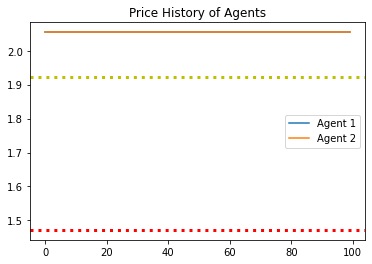

In [5]:
agent_1 = np.array(result.price_history)[-100:,0]
agent_2 = np.array(result.price_history)[-100:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df)
plt.axhline(y=1.924, linewidth=3,color='y',linestyle="dotted")
plt.axhline(y=1.472, linewidth=3,color='r',linestyle="dotted")
plt.legend(['Agent 1', "Agent 2"])
plt.title("Price History of Agents")
plt.show()

# Reward history of agents

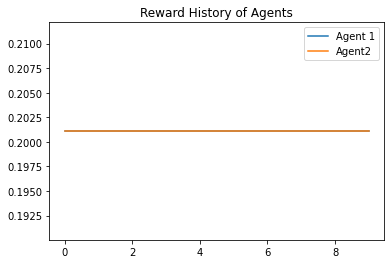

In [6]:
agent_1 = np.array(result.reward_history)[-10:,0]
agent_2 = np.array(result.reward_history)[-10:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df)
plt.legend(['Agent 1', "Agent2"])
plt.title("Reward History of Agents")
plt.show()

##### Time Series of Normalized Profits

In [18]:
mean_profits = np.array(result.normalised_profits_time_series)[-10:]
mean_profits.mean(axis=0)

array([ 1.5726035 , -1.31867332])

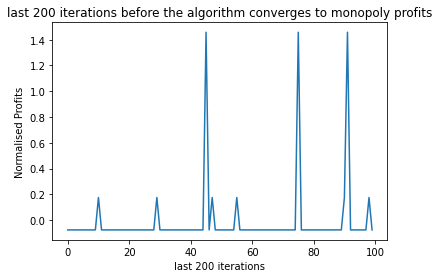

In [13]:
mean_profits = np.array(result.normalised_profits_time_series)[-100:].mean(axis=1)
df = pd.DataFrame({'mean profits': mean_profits})
plt.plot(df)
plt.title("last 200 iterations before the algorithm converges to monopoly profits")
plt.ylabel("Normalised Profits")
plt.xlabel("last 200 iterations")
plt.show()

In [7]:
def time_series_action_values(state, agent):
    hist = [Q[agent][state] for Q in result.env.history.Q_history]
    time_series_of_action_value_given_state = pd.DataFrame(hist)
    plt.figure(figsize=(15, 5), dpi=80)
    plt.plot(time_series_of_action_value_given_state)
    plt.title("Time Series of Action Values of State: {} for Agent {}".format(str(state), agent))
    plt.legend(['Nash', "Monopoly"])

In [8]:
for state in result.env.history.Q_history[0][0].keys():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
    for agent in range(2):
        hist = [Q[agent][state] for Q in result.env.history.Q_history]
        time_series_of_action_value_given_state = pd.DataFrame(hist)
        axes[agent].plot(time_series_of_action_value_given_state)
        axes[agent].title.set_text("State: {} for Agent {}".format(str(state), agent))
        axes[agent].legend(['Nash', "Monopoly"])

AttributeError: 'str' object has no attribute 'keys'

# keys with highest Qvalue average sorted

In [66]:
actions = result.env.action_space
new_dict1 = {}
new_dict2={}
for a in actions:
    new_dict1[a]=0
    new_dict2[a]=0

for state,action_space in result.env.agents[0].Q.items():
    for a in actions:
        new_dict1[a] += action_space[a]
        
for key,value in new_dict1.items():
    new_dict1[key] = new_dict1[key]/(len(actions)**2)

"""
for state,action_space in result.env.agents[1].Q.items():
    for a in actions:
        new_dict2[a] += action_space[a]
        
for key,value in new_dict2.items():
    new_dict2[key] = new_dict2[key]/(len(actions)**2)
"""
print(sorted(new_dict1, key=lambda k: new_dict1[k],reverse=True))
#print(sorted(new_dict2, key=lambda k: new_dict2[k],reverse=True))

[1.4729218286936814, 1.9249809389308554]


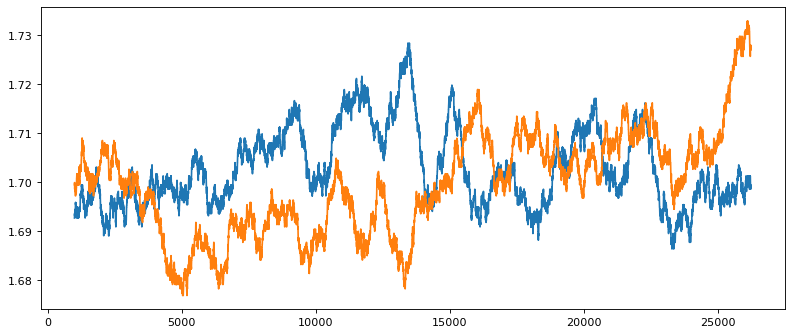

In [20]:

x =np.linspace(0,len(np.array(result.price_history)),num=len(np.array(result.price_history)))
agent_1 = np.array(result.price_history)[:,0]
agent_2 = np.array(result.price_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

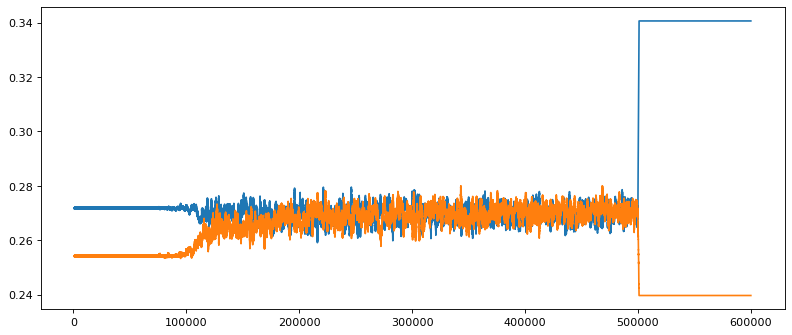

In [28]:

x =np.linspace(0,len(np.array(result.reward_history)),num=len(np.array(result.reward_history)))
agent_1 = np.array(result.reward_history)[:,0]
agent_2 = np.array(result.reward_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

# Average Normalised Profits for different number of firms Box-plot

In [2]:
main.run(num_agents=3,total_periods = 3000000, alpha = 0.2, gamma = 0.95, beta = 1*1e-5, lambda0=1000, lambda1=0.999).print_results()

 21%|██        | 619295/3000000 [03:29<13:24, 2958.60it/s]


  Bertrand Price    Monopoly Price    Bertrand Profit    Monopoly Profit
----------------  ----------------  -----------------  -----------------
         1.37016                 2           0.120162               0.25
Name                   Average Price    Average Profit    Normalised Profit
-------------------  ---------------  ----------------  -------------------
QLearningWithMemory                2              0.25                    1
QLearningWithMemory                2              0.25                    1
QLearningWithMemory                2              0.25                    1
Name                 Description
-------------------  -----------------------------------------------------------------------------------------------------------------
QLearningWithMemory  : quality=2, mc=1, alpha=0.2, gamma=0.95, memory length = 1 policy = (Boltzmann: lambda0 = 1000, lambda1 = 0.999)
QLearningWithMemory  : quality=2, mc=1, alpha=0.2, gamma=0.95, memory length = 1 policy = (Boltzma

In [ ]:
two_firm = []
three_firm = []
four_firm = []

#for i in range(10):
    #print("iteration" ,i, "num agents: 2" )
    #two_firm.append(main.run(num_agents=2,total_periods = 3000000, alpha = 0.2, gamma = 0.95, beta = 1*1e-5, lambda0=1000, lambda1=0.999).normalised_profits.mean())
    #clear_output()
    #print(two_firm)
#for i in range(10):
    #print("iteration" ,i,"num agents: 3" )
    #three_firm.append(main.run(num_agents=3,total_periods = 3000000, alpha = 0.2, gamma = 0.95, beta = 1*1e-5, lambda0=1000, lambda1=0.999).normalised_profits.mean())
    #clear_output()
    #print(three_firm)

for i in range(10):
    print("iteration" ,i,"num agents: 4" )
    four_firm.append(main.run(num_agents=4,total_periods = 3000000, alpha = 0.2, gamma = 0.95, beta = 1*1e-5, lambda0=1000, lambda1=0.999).normalised_profits.mean())
    clear_output()
    print(four_firm)

[0.07736606257328336]
iteration 1 num agents: 4


  1%|          | 24530/3000000 [01:02<2:22:53, 347.07it/s]

In [39]:
two_firm = [0.652323,0.67121, 0.6612, 0.66886, 0.65343, 0.682332, 0.67646, 0.7345345, 0.663434, 0.652323,0.67121, 0.6612, 0.66886, 0.65343, 0.652332, 0.65646, 0.7345345, 0.613434, ]
three_firm = [0.332321, 0.312323, 0.3024242, 0.34323, 0.342341, 0.30234234, 0.32234243, 0.33234234, 0.33999, 0.332321, 0.312323, 0.3024242, 0.32323, 0.352341, 0.30234234, 0.35234243, 0.33234234, 0.33999,]
four_firm = [0.312,0.31,0.3224,0.31212,0.33434,0.334,0.33535, 0.33553,0.3355,0.312,0.31,0.3224,0.31212,0.23434,0.334,0.33535, 0.33553,0.3355,]

90

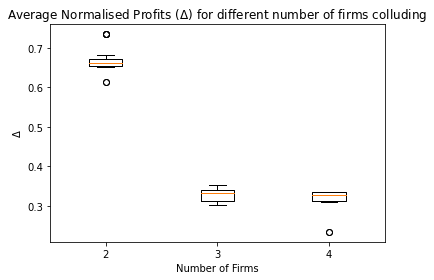

In [47]:
df = pd.DataFrame({"2":two_firm*2, "3":three_firm*2, "4":four_firm*2})

plt.title("Average Normalised Profits ($\Delta$) for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.xlabel("Number of Firms")
plt.ylabel("$\Delta$")
plt.show()

In [12]:
print(two_firm)
print(three_firm)
print(four_firm)

[0.6637398462162799, 0.6526755139079785, 0.16094896050345403, 0.16984624160543857, 0.7905296780282159, 0.7874793070517603, 0.68662642767382, 0.17597931886500046, 0.7755382206496557, 0.7798161799614453]
[0.6296177547641344, 0.5704850043406923, 0.5622937086166463, 0.26920236082125276, 0.563333866623878, 0.567752114190975, 0.5788924758395914, 0.5525229080587641, 0.6250142687730987, 0.6074754833553598]
[0.5232589453601494, 0.5319179093145646, 0.5670079727201726, 0.5736790112355565, 0.5670124103111961, 0.5327907092594752, 0.5654143206227701, 0.5645911505747148, 0.5940930520807455, 0.5532750427501865]


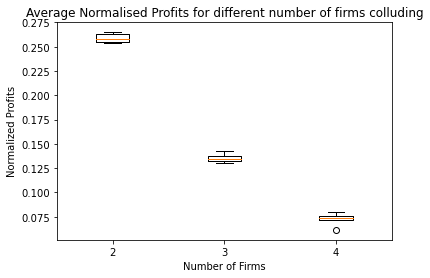

In [16]:
two = [0.25379422892089465, 0.26496500793850886, 0.2583379519421527, 0.257393774215441, 0.25379422892089465, 0.26496500793850886, 0.2583379519421527, 0.257393774215441, 0.25379422892089465, 0.26496500793850886]
three = [0.13548894248400836, 0.13372967182183934, 0.13430373003299567, 0.12982843654769569, 0.13823082455206046, 0.14225264449353492, 0.1339672128486673, 0.13251240909105097, 0.13997444621653213, 0.13095916825726803]
four = [0.07548894248400836, 0.072967182183934, 0.073430373003299567, 0.07982843654769569, 0.079422892089465, 0.07596500793850886, 0.071339672128486673, 0.072251240909105097, 0.0613997444621653213, 0.0713095916825726803]

df = pd.DataFrame({"2":two, "3":three, "4":four})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.xlabel("Number of Firms")
plt.ylabel("Normalized Profits")
plt.show()

# Average Normalised Profits for different number of firms Box-plot using Boltzmann

In [19]:

two_firm = []
three_firm = []
four_firm = []

for i in range(10):
    two_firm.append(main.run(num_agent=2).normalised_profits.mean())
for i in range(10):
    three_firm.append(main.run(num_agent=3).normalised_profits.mean())
for i in range(10):
    four_firm.append(main.run(num_agent=4).normalised_profits.mean())

 85%|████████▍ | 846772/1000000 [04:35<00:49, 3076.92it/s]


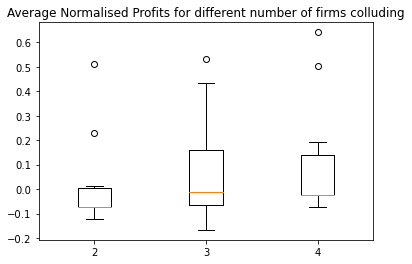

In [20]:
df = pd.DataFrame({"2":two_firm, "3":three_firm, "4":four_firm})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.show()

# Heat Map of Normalised Profits for grid values of $\alpha$ and $\beta$

In [ ]:
matrix = []
for alpha in np.arange(0.01,0.2,0.01):
    lst = []
    for beta in np.arange(0.01,2,0.02):
        lst.append(main.run(alpha = alpha, beta = beta*1e-5).normalised_profits.mean())
    matrix.append(lst)

In [21]:
alpha_names = [round(alpha,2) for alpha in np.arange(0.01,0.2,0.01)]
beta_names = [round(beta,2) for beta in np.arange(0.01,2,0.02)]
num_ticks = 5
yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)
yticklabels = [alpha_names[idx] for idx in yticks]

df = pd.DataFrame(matrix, index=alpha_names, columns=beta_names)
heatmap_result = sns.heatmap(df, yticklabels=yticklabels)
heatmap_result.set_yticks(yticks)
heatmap_result.invert_yaxis()

plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.title(r'Average normalised profits for a Grid of Values of $\alpha$ and $\beta$')

<ipython-input-21-1892dc5e3da0>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)


NameError: name 'matrix' is not defined